Successfully fetched the page
Successfully found highstockdata
Table found
365
            timestamp  value  year  month yyyy-mm
0 2024-05-07 12:00:00    135  2024      5  May-24
1 2024-05-08 12:00:00    144  2024      5  May-24
2 2024-05-09 12:00:00    145  2024      5  May-24
3 2024-05-10 12:00:00    153  2024      5  May-24
4 2024-05-11 12:00:00    123  2024      5  May-24


<Axes: ylabel='Frequency'>

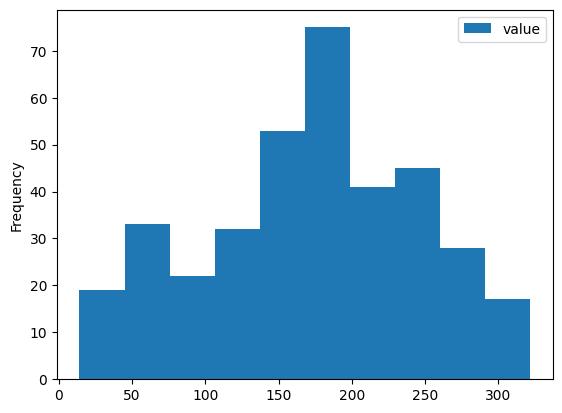

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import requests
import json

base_url = "https://www.trc.govt.nz/environment/maps-and-data/site-details/LoadGraphAndListData/"
site_link = "?siteID="
measure_link = "&measureID="
time_link = "&timePeriod="
date_link = "&fromDate="

sites = {
    "id": [8, 32, 33, 4, 42, 24],
    "site": ["Kapoaiaia at Cape Egmont", "Stony at Mangatete Bridge", "Taungatara at Eltham Road", "Waiwhakaiho at Hillsborough", "Waitara at Bertrand Road", "North Egmont at Visitor Centre"],
    "wd": [True, False, True, True, False, False],
    "wg": [True, False, True, True, False, False],
    "ws": [True, False, True, True, False, False],
    "at": [True, True, True, True, False, True],
    "rf": [True, True, True, True, True, True],
    "cu": [True, True, True, True, True, False],
    "ht": [True, True, True, True, False, False],
    "sm": [True, False, True, True, False, False]
}
df_sites = pd.DataFrame(sites)

#Add a comment on measures

measures = {
    "id": [10, 4, 2, 3, 1, 9, 7, 5],
    "label": ["wg", "wd", "ws", "at", "rf", "cu", "ht", "sm"],
    "description": ["Wind Gust", "Wind Direction", "Wind Speed", "Air Temperature", "Rainfall", "River Flow", "River Level", "Soil Moisture"],
    "weather": [True, True, True, True, True, False, False, False],
    "river": [False, False, False, False, True, True, True, True]
}
df_measures = pd.DataFrame(measures)

timelink = {
    "id": [1, 2, 3],
    "label": ["7days", "30days", "365days"]
}
df_timelink = pd.DataFrame(timelink)

test_link = base_url + site_link + "8" + measure_link + "4" + time_link + "365days"

try:
    response = requests.get(test_link)
    response.raise_for_status()
    print("Successfully fetched the page")

# response_data_string = response.text # Get the text content
# data = json.loads(response_data_string)

    response_data_string = response.text
    data = json.loads(response_data_string)
    raw_data = data.get('highStockData')
    print("Successfully found highstockdata")
    
    if raw_data:
        print("Table found")
        print(len(raw_data))
        df_data = pd.DataFrame(raw_data, columns=['timestamp', 'value'])
        df_data['timestamp'] = pd.to_datetime(df_data['timestamp'], unit='ms')
        df_data['year'] = pd.DatetimeIndex(df_data['timestamp']).year
        df_data['month'] = pd.DatetimeIndex(df_data['timestamp']).month
        df_data['mm-yyyy'] = df_data['timestamp'].apply(lambda x: x.strftime('%B-%y'))
        
        
    print(df_data.head())
    
except: pass

df_data.plot(kind = 'hist', x = 'timestamp', y = 'value')

